# KD Tree for Bottleneck TSP

In [1]:
%load_ext autoreload
%autoreload 2

## Load Spotify Data

In [2]:
import tekore as tk
from smoothify.features import construct_features
import numpy as np

In [3]:
ACCESS_TOKEN = "BQC4W4CMqSSLKW3Y1CjYmeNEWPhnfDYxLWEHi62AnzM85xH1tyP-TebHDpmt5KkmK84PjJuqJmSCIzvBw-XX0rvDhTmynyVDvoU4qYZmAiL6bXVpF2oKbXRZpiS4NXvb4KMM-9wbF1GknCxuwfuTqeeqsJsCGp2U1-8x5_pO-9Y"
spotify = tk.Spotify(ACCESS_TOKEN, asynchronous=True, max_limits_on=True, chunked_on=True)

### Fetch current user's tracks

In [4]:
saved_tracks_page = await spotify.saved_tracks()
track_list = [track.track async for track in spotify.all_items(saved_tracks_page)]

### Query Spotify API for audio features

In [5]:
# Extract track IDs so we can fetch additional info
track_id_list = [track.id for track in track_list]
# Get track audio features
track_features_list = await spotify.tracks_audio_features(track_id_list)

### Construct & normalize audio features

In [6]:
features_df = construct_features(audio_features_list=track_features_list)
features_df.head(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.199170,1.398627,1.085938,2.750730,-0.154713,-0.625698,0.995436,0.267796,-0.027524
1,0.944523,0.235835,0.165445,-0.359783,-0.707916,1.620329,-0.618357,1.524470,0.219609
2,-0.259890,0.828305,0.101406,-0.609708,0.011364,1.518275,-0.453500,-1.531044,0.137498


In [7]:
points = np.array(features_df)

## Compute the best path through the points

In [8]:
import random
from functools import partial
from typing import List, Tuple

import pandas as pd
import scipy.spatial
from scipy.spatial import cKDTree
from joblib import Parallel, delayed

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
sns.set_theme()

In [9]:
from smoothify.optim.bottleneck_tsp import KDTreeBottleneckTSP

In [10]:
optimizer = KDTreeBottleneckTSP(points=points)
results = optimizer.get_best_path()
best_path = results.best_path
max_dist = results.min_max_dist
print(f"Max edge length: {max_dist}")
print(best_path)

  0%|                                                                                                                                                                                                                                 | 0/491 [00:00<?, ?it/s]

[ProgressParallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 491/491 [00:14<00:00, 33.79it/s]

[ProgressParallel(n_jobs=-1)]: Done 491 out of 491 | elapsed:   14.5s finished
Max edge length: 4.966394024515111
[165, 186, 338, 135, 399, 95, 421, 269, 273, 182, 377, 206, 155, 132, 105, 302, 268, 344, 265, 289, 197, 61, 439, 249, 54, 202, 64, 267, 306, 360, 179, 307, 385, 122, 118, 303, 423, 328, 139, 318, 92, 13, 232, 216, 386, 169, 111, 365, 394, 225, 145, 181, 160, 151, 91, 30, 323, 378, 133, 66, 196, 255, 219, 235, 288, 277, 380, 26, 75, 348, 354, 183, 308, 190, 283, 271, 94, 446, 408, 317, 316, 331, 21, 117, 171, 93, 472, 324, 192, 483, 371, 375, 125, 480, 25, 290, 364, 367, 126, 402, 276, 109, 333, 49, 141, 154, 432, 100, 42, 123, 87, 40, 339, 130, 405, 134, 76, 345, 36, 299, 229, 274, 346, 38, 356, 207, 407, 297, 456, 227, 412, 452, 33, 460, 47, 362, 156, 119, 231, 50, 173, 116, 48, 46, 294, 211, 266, 131, 210, 82, 99, 153, 241, 178, 43, 115, 279, 81, 292, 275, 309, 343, 427, 463, 310, 243, 406, 177, 431, 1, 482, 358, 214, 205, 166, 475, 466, 200, 451, 194, 222, 340, 376, 208

<AxesSubplot:>

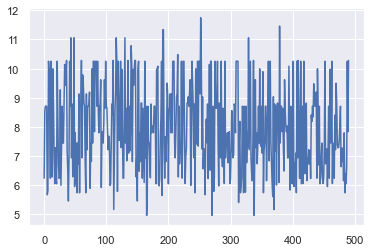

In [11]:
sns.lineplot(data=(results.max_dists))